# **Creating a Filter, Edge Detection**
## Please add your own two images and perform the operation
Import resources and display images


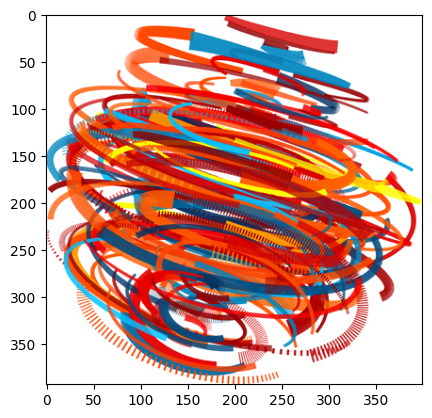

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('/content/illuminations_b_0045.jpg')

plt.imshow(image)

Let's convert the image to gray scale

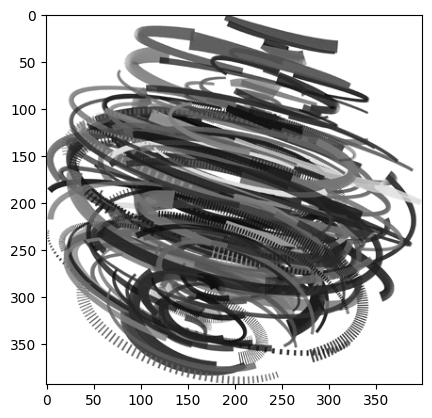

In [ ]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

Let's use a sobel operator to detect and enhance horizontal edges

(-0.5, 399.5, 392.5, -0.5)

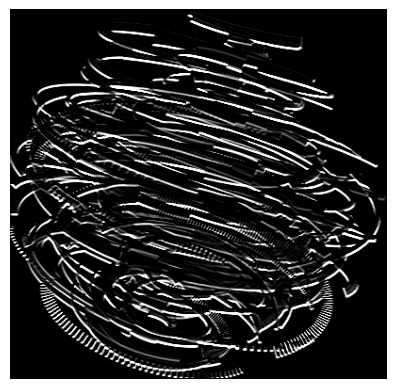

In [ ]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')
plt.xticks([], [])
plt.yticks([], [])
plt.axis('off')

let's do the same for vertical edges

(-0.5, 399.5, 392.5, -0.5)

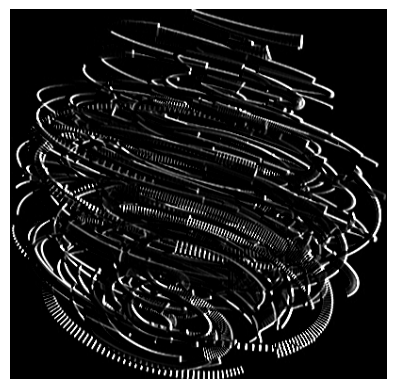

In [ ]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_x, cmap='gray')
plt.xticks([], [])
plt.yticks([], [])
plt.axis('off')

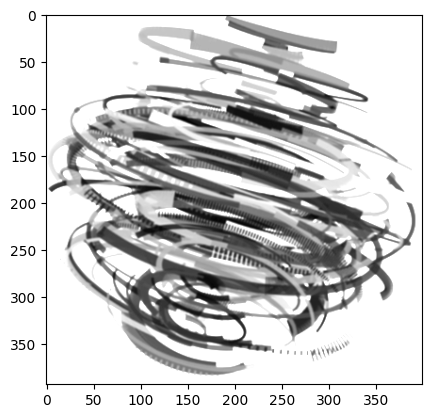

In [ ]:
# let's try blurring

sobel_x_blur = np.array([
    [1/9, 2/9, 1/9],
    [2/9, 4/9, 2/9],
    [1/9, 2/9, 1/9]
])

filtered_image_x = cv2.filter2D(gray, -1, sobel_x_blur)

plt.imshow(filtered_image_x, cmap='gray')

let's try for another image

(-0.5, 1919.5, 1079.5, -0.5)

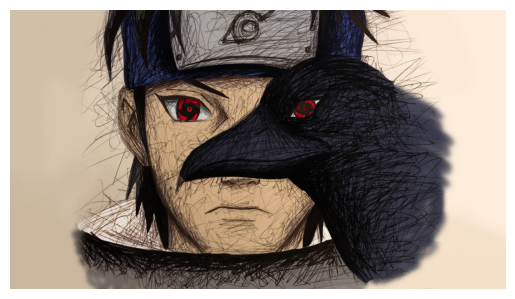

In [ ]:
new_image = mpimg.imread('/content/1003952.png')
plt.imshow(new_image)
plt.xticks([], [])
plt.yticks([], [])
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

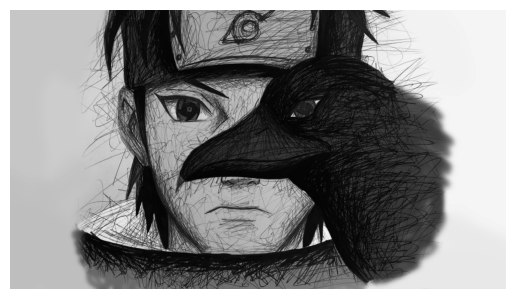

In [ ]:
# Convert to grayscale for filtering
gray_2 = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_2, cmap='gray')
plt.xticks([], [])
plt.yticks([], [])
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

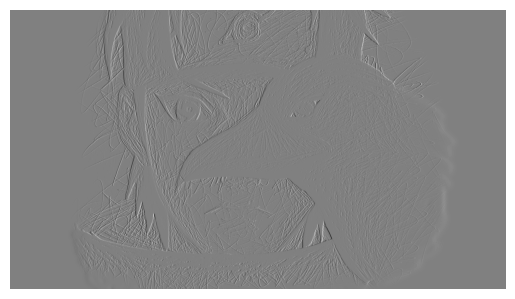

In [ ]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image_x = cv2.filter2D(gray_2, -1, sobel_x)

plt.imshow(filtered_image_x, cmap='gray')
plt.xticks([], [])
plt.yticks([], [])
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

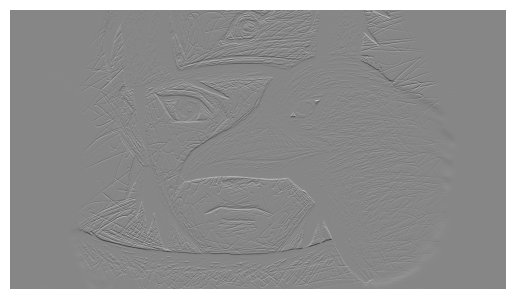

In [ ]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray_2, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')
plt.xticks([], [])
plt.yticks([], [])
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

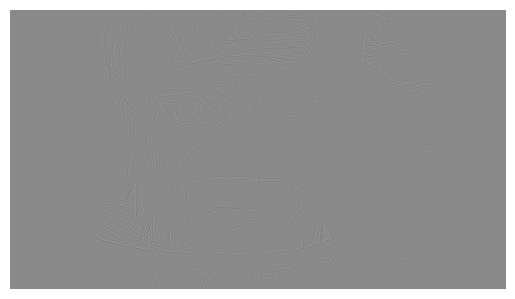

In [ ]:
# 3x3 array for edge detection
sobel_edge = np.array([[ 0, -1, 0],
                   [ -1, 4, -1],
                   [ 0, -1, 0]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray_2, -1, sobel_edge)

plt.imshow(filtered_image, cmap='gray')
plt.xticks([], [])
plt.yticks([], [])
plt.axis('off')

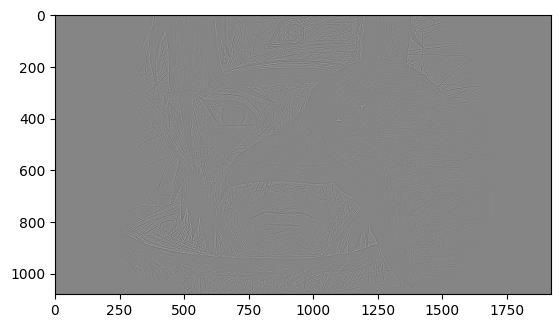

In [ ]:
# 3x3 array for edge detection
outline = np.array([
    [ -1, -1, -1],
    [ -1, 8, -1],
    [ -1, -1, -1]
])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray_2, -1, outline)

plt.imshow(filtered_image, cmap='gray')


let's try making a convolutional layer

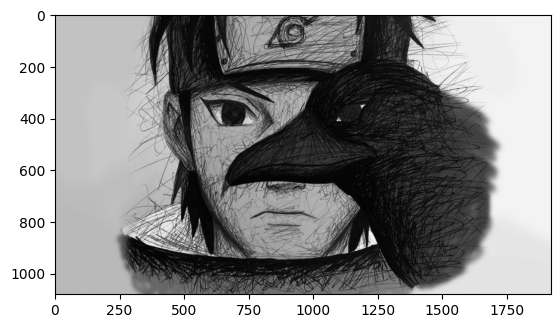

In [ ]:
input_img = mpimg.imread('/content/1003952.png')
# convert to grayscale
gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# let's normalize i.e., rescale the img so entries lie in [0,1]
gray_img = gray_img.astype('float32')/255

# plot the image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [ ]:
import numpy as np


filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [ ]:
# Defining four different filters,
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print('Filter 1: \n', filter_1)
print('Filter 2: \n', filter_2)
print('Filter 3: \n', filter_3)
print('Filter 4: \n', filter_4)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
Filter 2: 
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]
Filter 3: 
 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]
Filter 4: 
 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


The `annotate()` function is used to add text annotations on top of the image. The first argument to the function is the text that you want to annotate. The second argument is a tuple that specifies the position of the annotation. The `xy` parameter specifies the (x,y) coordinates of the annotation, and the `horizontalalignment` and `verticalalignment` parameters specify how the text should be aligned with respect to the (x,y) coordinates. Finally, the `color` parameter specifies the color of the text. If the filter value is negative, then the text color is set to white, otherwise it is set to black.


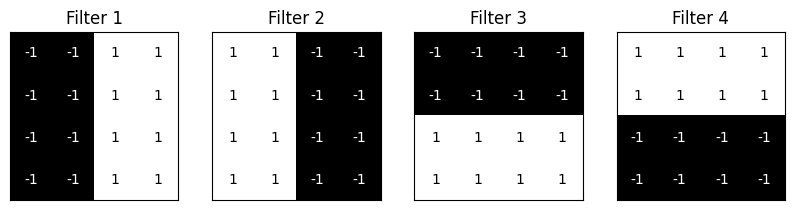

In [ ]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title(f'Filter {i+1}')

    # let's start annotating on the images.
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

# CONVOLUTIONAL LAYER
let's define  a convolutional layer and use it simply for visualization purpose i.e., what happens when we pass an img as input to this layer.
A convolutional layer + activation function, followed by a pooling layer, and a linear layer (to create a desired output size) make up the basic layers of a CNN.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# define a neural network with a single convolutional layer with four filters
# and a pooling layer of size (2,2)
class Net(nn.Module):

    def __init__(self, weight):
        super().__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        # only here we are giving custom weights. normal the network learns on itself.
        self.conv.weight = torch.nn.Parameter(weight)
        # now let's define a pooling layer
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)

        # applying pooling layer
        pooled_x = self.pool(activated_x)

        # returns both layers
        return conv_x, activated_x, pooled_x

# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


now let's start visualizing the o/ps of each layer

In [ ]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title(f'Output {i+1}')

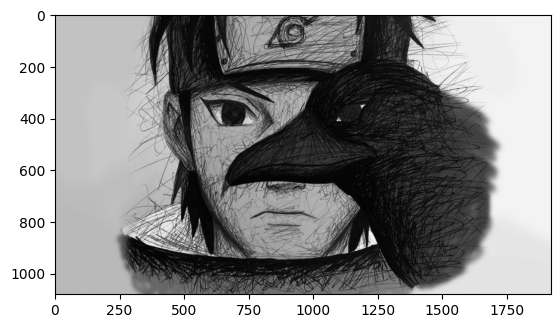

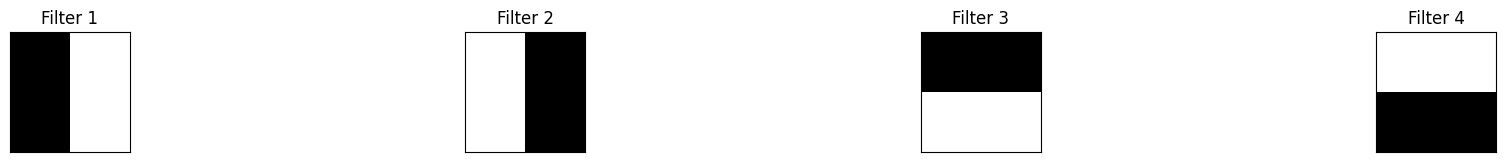

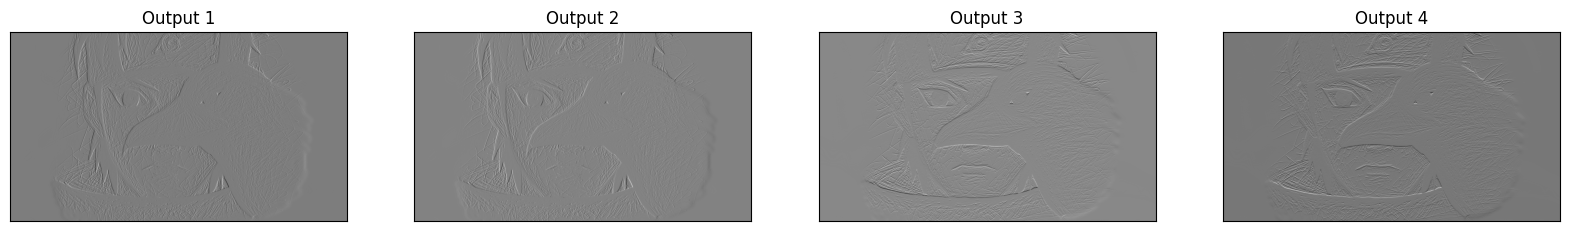

In [ ]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title(f'Filter {i+1}')


# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get all the layers
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

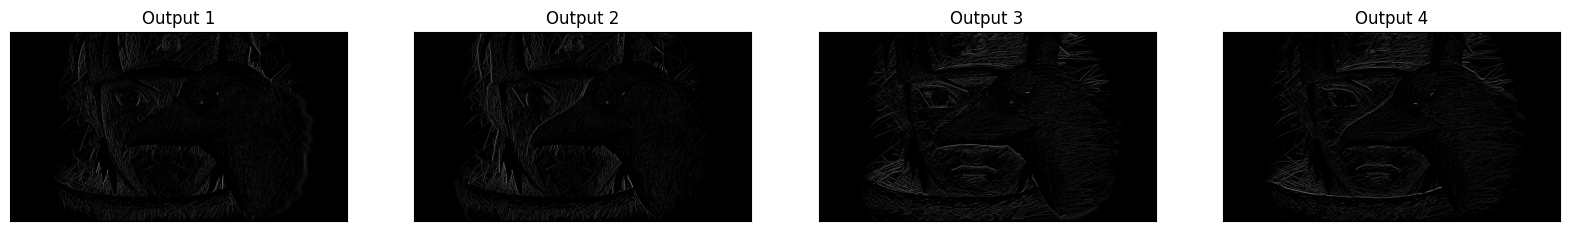

In [ ]:
# we got some gray image because no values are zero yet
# so let's visualize the o/p after activation

viz_layer(activated_layer)

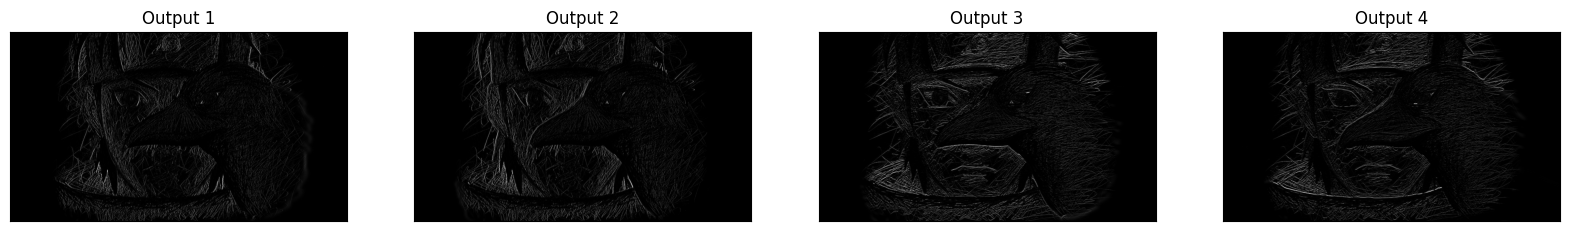

In [ ]:
# visualize the o/p of the pooling layer
viz_layer(pooled_layer)